In [2]:
# Import the SQL database into Pandas. (Yes, you could read the CSVs directly in Pandas, but you are, after all, trying to prove your technical
# mettle.) This step may require some research. Feel free to use the following code to get started. Be sure to make any necessary modifications
# for your username, password, host, port, and database name:
import psycopg2
import pandas as pd
import pandas.io.sql as psql
import config
from sqlalchemy import create_engine
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(config.username, config.password, 'localhost', 5432, 'employeedb'))
connection = engine.connect()

In [3]:
# Fill null values with NaN
df = pd.read_sql_query("SELECT * FROM employees", connection)
df.fillna(value=pd.np.nan, inplace=True)
df

C:\Users\vasan\AppData\Local\Temp/ipykernel_21864/3981102761.py:3: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  df.fillna(value=pd.np.nan, inplace=True)


,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date
0,473302,s0001,7/25/1953,Hideyuki,Zallocco,M,4/28/1990
1,475053,e0002,11/18/1954,Byong,Delgrande,F,9/7/1991
2,57444,e0002,1/30/1958,Berry,Babb,F,3/21/1992
3,421786,s0001,9/28/1957,Xiong,Verhoeff,M,11/26/1987
4,282238,e0003,10/28/1952,Abdelkader,Baumann,F,1/18/1991
...,...,...,...,...,...,...,...
300019,464231,s0001,8/14/1958,Constantino,Eastman,M,10/28/1988
300020,255832,e0002,5/8/1955,Yuping,Dayang,F,2/26/1995
300021,76671,s0001,6/9/1959,Ortrud,Plessier,M,2/24/1988
300022,264920,s0001,9/22/1959,Percy,Samarati,F,9/8/1994


In [4]:
# Read the database into a Pandas DataFrame.
employees_df = pd.read_sql_query("Select sal.salary from employees emp,salaries sal where emp.emp_no=sal.emp_no ", connection)
employees_df.fillna(value=pd.np.nan, inplace=True)
employees_df

C:\Users\vasan\AppData\Local\Temp/ipykernel_21864/394615874.py:3: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  employees_df.fillna(value=pd.np.nan, inplace=True)


,salary
0,48973
1,40000
2,43548
3,63377
4,40000
...,...
300019,40000
300020,40000
300021,59703
300022,48038


<AxesSubplot:title={'center':'Most common salary ranges for employees'}, ylabel='Frequency'>

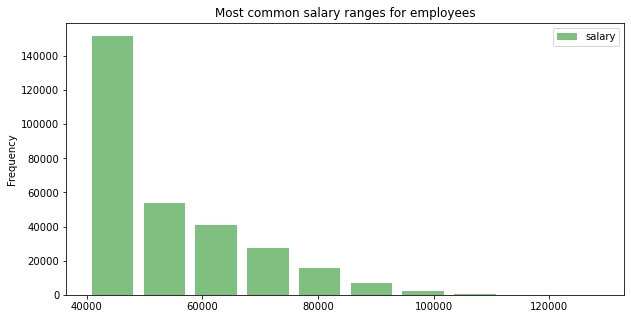

In [11]:
# Create a histogram to visualize the most common salary ranges for employees
employees_df.plot(kind='hist', figsize=(10,5), legend=True, color='green', alpha=0.5, rwidth=0.8, title = 'Most common salary ranges for employees',xlabel='Salary', ylabel='Frequency')

In [8]:
# Create a bar chart of average salary by title.
avg_salary_by_title_df = pd.read_sql_query("Select title, avg(sal.salary) as avgsal from employees emp,salaries sal,titles where emp.emp_no=sal.emp_no and emp.emp_title_id =titles.title_id group by title", connection)
avg_salary_by_title_df.fillna(value=pd.np.nan, inplace=True)
avg_salary_by_title_df

C:\Users\vasan\AppData\Local\Temp/ipykernel_21864/647268699.py:3: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  avg_salary_by_title_df.fillna(value=pd.np.nan, inplace=True)


,title,avgsal
0,Assistant Engineer,48564.434447
1,Engineer,48535.336511
2,Manager,51531.041667
3,Senior Engineer,48506.799871
4,Senior Staff,58550.172704
5,Staff,58465.382850
6,Technique Leader,48582.896092


<AxesSubplot:title={'center':'Average salary by title'}, xlabel='Title', ylabel='Average Salary'>

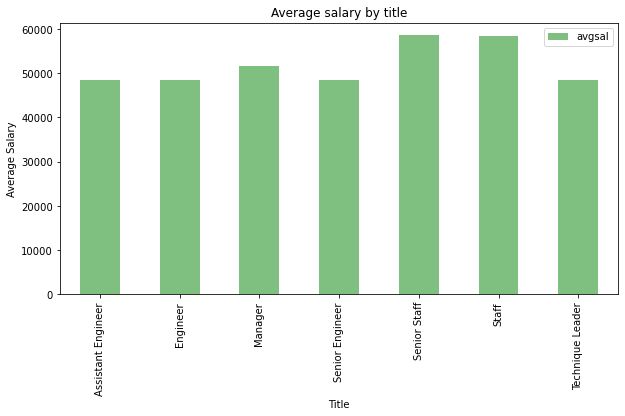

In [10]:
# Create a bar chart of average salary by title.
avg_salary_by_title_df.plot(kind='bar', x='title', y='avgsal', figsize=(10,5), legend=True, color='green', alpha=0.5, title = 'Average salary by title',xlabel='Title', ylabel='Average Salary')